Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 28, 64)            5952      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 9,386
Trainable params: 9,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 52s 34ms/step - loss: 0.5499 - accuracy: 0.8328 - val_loss: 0.2765 - val_accuracy: 0.9213
Epoch 2/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2678 - accuracy: 0.9236 - val_loss: 0.2022 - val_accuracy: 0.9427
Epoch 3/5
1500/1500 [=====

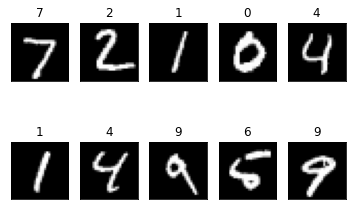

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.datasets.mnist import load_data
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten
from keras.optimizers import Adam

(train_images, train_labels), (test_images, test_labels) = load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

#model
model = Sequential()
#Simple RNN
model.add(SimpleRNN(units = 64, input_shape = (28, 28), return_sequences = True))
#Simple RNN
model.add(SimpleRNN(units = 32))
#FC
model.add(Dense(10, activation = 'softmax'))

#compile
model.compile(
    optimizer = Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
#summary
model.summary()
#fit
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32, validation_split = 0.2)

#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' %(np.argmax(labels[i])))
  subplot.imshow(test_images[i].reshape(28, 28), cmap = 'gray')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.datasets.mnist import load_data
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten
from keras.optimizers import Adam

(train_images, train_labels), (test_images, test_labels) = load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

#model
model = Sequential()
#Simple RNN
model.add(SimpleRNN(units = 64, input_shape = (28, 28), return_sequences = True))
#Simple RNN
model.add(SimpleRNN(units = 64, return_sequences = True))
#Simple RNN
model.add(SimpleRNN(units = 32))
#FC
model.add(Dense(10, activation = 'softmax'))

#compile
model.compile(
    optimizer = Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
#summary
model.summary()
#fit
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32, validation_split = 0.2)

#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' %(np.argmax(labels[i])))
  subplot.imshow(test_images[i].reshape(28, 28), cmap = 'gray')
plt.show()